# LDA introduction.

Natural language processing (NLP) employs the probabilistic topic modeling method known as Latent Dirichlet Allocation (LDA).

By identifying the topics that most accurately represent each theme, LDA aims to reveal the hidden thematic structure of a group of documents.

LDA can be used to find the topics that are most pertinent to computer science, mathematics, and physics in the case of abstracts for STEM subjects.

We begin by preprocessing the text data for this purpose in order to get rid of stop words, punctuation, and other extraneous details.

In order to represent the frequency of each term in each document, we tokenize the text to separate it into individual words or phrases.

The topics that best explain the variation in the data can be found using LDA once we have the document-term matrix.

Until the model converges on a stable solution, this entails repeatedly assigning each word in each document to a topic and adjusting the topic probabilities.

The LDA model produces a list of topics, each of which is represented by a distribution over the vocabulary words.

The topics can then be understood by looking at the most frequently occurring words in each topic and using domain knowledge to assign them to pertinent STEM subject areas.

We previously conduct a similar procedure using TF-IDF, and this model will work in tandom with the website that we have created for the users to input their abstracts.

We first begin by importing the libraries that will be using.

In [ ]:
pip install pyLDAvis


In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rayni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rayni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rayni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rayni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

You can use the following command line to import the dataset file in case youre using Google Colab.

In [14]:
from google.colab import files

uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import pickle

# libraries for visualization
import pyLDAvis
import pyLDAvis.lda_model
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models as gensimvis
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


We will then import our data set as we did before.

In [2]:
train_df = pd.read_csv('abstracts.csv')
train_df.head()

,ID,TITLE,ABSTRACT
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        20972 non-null  int64 
 1   TITLE     20972 non-null  object
 2   ABSTRACT  20972 non-null  object
dtypes: int64(1), object(2)
memory usage: 491.7+ KB


## Data cleaning and preprocessing.
And afterwords, we will have our cleaning function. this function performs a series of common text preprocessing steps to remove noise and irrelevant information from the input text, which can improve the accuracy of natural language processing tasks. These steps include removing punctuation, removing words that are entirely composed of digits, and removing short words.



In [3]:
def clean_text(text):
    #The first line of the function creates a dictionary called clean_dict that maps each punctuation character in the string.punctuation string to an empty string.
    #This will be used to remove all punctuation characters from the text.
    clean_dict = {special_char: '' for special_char in string.punctuation}
    clean_dict[' '] = ' '
    #A translation table is created using the str.maketrans() method, which takes the clean_dict dictionary as input
    #and returns a translation table that can be used with the translate() method to remove punctuation from the text.
    table = str.maketrans(clean_dict)
    text_1 = text.translate(
        table
    )  #he translate() method is called on the input text using the translation table to remove all punctuation characters.
    text_Array = text_1.split()

    """
    A list comprehension is used to remove any words that are entirely composed of digits (isdigit()) or that have a length less than or equal to 3 characters.
    The remaining words are joined back together into a string with spaces between them using the join() method.
    The resulting cleaned text is converted to lowercase using the lower() method.
    """
    text_2 = ' '.join([
        word for word in text_Array
        if (not word.isdigit() and (not word.isdigit() and len(word) > 3))
    ])

    return text_2.lower()

We will then be using a Natural Language Toolkit (NLTK) library to remove stopwords from text data.

Stopwords are words that occur frequently in a language but do not carry much meaning, such as "a", "an", "the", "in", "of", etc.

The first two lines of the code import the stopwords module from NLTK and create a variable stop_words that contains a list of English stopwords.

Next, a function remove_stopwords is defined that takes a single argument text, which is a string containing text data.

The function splits the input text into an array of words using the split() method and then uses a list comprehension to remove any words that appear in the stop_words list.

The filtered words are then joined back together into a string using the join() method and returned.

Finally, the apply() method is used to apply the remove_stopwords function to every row in the 'ABSTRACT' column of the train_df DataFrame.

This removes the stopwords from the text data in each row and updates the 'ABSTRACT' column in-place with the cleaned text.

In [4]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


#We then create a function to remove the stopwords in our text.
def remove_stopwords(text):
    text_Array = text.split(' ')
    remove_words = " ".join([i for i in text_Array if i not in stop_words])
    return remove_words


#And here we will apply the remove_stopwords function. This will remove the stopwords from our dataset's text
train_df['ABSTRACT'] = train_df['ABSTRACT'].apply(remove_stopwords)


We will use the SpaCy library to perform lemmatization on a list of input texts. Lemmatization is the process of reducing words to their base or dictionary form, which can be useful for standardizing text data and reducing noise in natural language processing tasks. However before beginning to use the Spacy library, you must first install the required tools to begin using the Spacy library. Run the following commands in the terminal to install the required tools.
````
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download en_core_web_sm
````



In [5]:
'''
The first line of the code loads the 'en_core_web_md' SpaCy model, 
which is a medium-sized English language model that includes word vectors and supports part-of-speech tagging, 
named entity recognition, and dependency parsing. The 'parser' and 'ner' components are disabled using the disable parameter, 
which speeds up the processing time since these components are not needed for lemmatization.
'''
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *    

 
def lemmatization(texts,allowed_postags=['VERB', 'ADV','ADJ']): 
      nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
      output = []
      for sent in texts:
            doc = nlp(sent) 
            output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
      return output





In [7]:
train_df['ABSTRACT'].dtypes

dtype('O')

In [8]:
train_df['ABSTRACT'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20967    False
20968    False
20969    False
20970    False
20971    False
Name: ABSTRACT, Length: 20972, dtype: bool

In [6]:

text_list=train_df['ABSTRACT'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

  Rotation invariance translation invariance great values image
recognition tasks. In paper, bring new architecture convolutional
neural network (CNN) named cyclic convolutional layer achieve rotation
invariance 2-D symbol recognition. We also get position and
orientation 2-D symbol network achieve detection purpose for
multiple non-overlap target. Last least, architecture achieve
one-shot learning cases using invariance.

['great', 'bring', 'new', 'convolutional', 'neural', 'name', 'cyclic', 'convolutional', 'achieve', 'd', 'also', 'get', 'd', 'achieve', 'multiple', 'non', '-', 'overlap', 'last', 'least', 'achieve', 'use']


In [7]:
dictionary = corpora.Dictionary(tokenized_reviews)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_reviews]
bow_corpus[4310]

[(11, 3),
 (45, 1),
 (125, 1),
 (126, 1),
 (170, 1),
 (234, 1),
 (248, 1),
 (335, 1),
 (416, 1),
 (467, 1),
 (554, 2),
 (683, 1),
 (758, 1),
 (806, 1),
 (817, 3),
 (866, 1),
 (1083, 1),
 (1232, 1),
 (1346, 3),
 (1572, 3),
 (1667, 1),
 (1879, 6)]

In [8]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                            num_topics=5,
                                            id2word=dictionary,
                                            random_state=100,
                                            chunksize=1000,
                                            passes=50,
                                            iterations=100,
                                            update_every=1,
                                            alpha='auto')


In [10]:
lda_model_multi = gensim.models.LdaMulticore(corpus=bow_corpus,
                                             num_topics=5,
                                             id2word=dictionary,
                                             workers=2,
                                             random_state=100,
                                             chunksize=1000,
                                             passes=50,
                                             iterations=100)


In [9]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 -
1 aim
2 allow
3 also
4 analyse
5 analyze
6 associate
7 binary
8 compare
9 compose
10 cortical


In [11]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [12]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(
        bow_doc_4310[i][0], dictionary[bow_doc_4310[i][0]],
        bow_doc_4310[i][1]))


Word 11 ("detect") appears 3 time.
Word 45 ("reduce") appears 1 time.
Word 125 ("finally") appears 1 time.
Word 126 ("interest") appears 1 time.
Word 170 ("metallic") appears 1 time.
Word 234 ("main") appears 1 time.
Word 248 ("utilize") appears 1 time.
Word 335 ("giant") appears 1 time.
Word 416 ("adequate") appears 1 time.
Word 467 ("check") appears 1 time.
Word 554 ("geometric") appears 2 time.
Word 683 ("create") appears 1 time.
Word 758 ("odd") appears 1 time.
Word 806 ("possible") appears 1 time.
Word 817 ("internal") appears 3 time.
Word 866 ("begin") appears 1 time.
Word 1083 ("logarithmic") appears 1 time.
Word 1232 ("fine") appears 1 time.
Word 1346 ("employ") appears 3 time.
Word 1572 ("categorical") appears 3 time.
Word 1667 ("stimulate") appears 1 time.
Word 1879 ("probe") appears 6 time.


In [22]:
train_df['ABSTRACT'].shape

(20972,)

In [23]:
train_df['ABSTRACT'].size

20972

In [13]:
lda_model.print_topics()

[(0,
  '0.023*"give" + 0.022*"good" + 0.020*"couple" + 0.014*"also" + 0.010*"reasonable" + 0.009*"derive" + 0.008*"decrease" + 0.008*"induce" + 0.008*"finite" + 0.007*"atomic"'),
 (1,
  '0.027*"yield" + 0.018*"reduce" + 0.018*"main" + 0.014*"significantly" + 0.010*"different" + 0.009*"couple" + 0.008*"easy" + 0.008*"classical" + 0.008*"overlap" + 0.008*"rely"'),
 (2,
  '0.019*"yield" + 0.018*"-" + 0.018*"couple" + 0.013*"reduce" + 0.012*"potential" + 0.010*"diagonal" + 0.010*"main" + 0.010*"particular" + 0.009*"convex" + 0.009*"also"'),
 (3,
  '0.036*"-" + 0.022*"particular" + 0.018*"biological" + 0.017*"equip" + 0.013*"pay" + 0.012*"fundamental" + 0.010*"algebraic" + 0.009*"verify" + 0.009*"fast" + 0.009*"severely"'),
 (4,
  '0.015*"kernel" + 0.014*"high" + 0.012*"reformulate" + 0.011*"yield" + 0.011*"giant" + 0.010*"couple" + 0.009*"short" + 0.009*"attract" + 0.007*"also" + 0.007*"consider"')]

In [14]:
lda_model_multi.print_topics()

[(0,
  '0.024*"give" + 0.020*"couple" + 0.020*"good" + 0.014*"also" + 0.011*"derive" + 0.010*"reasonable" + 0.008*"yield" + 0.007*"induce" + 0.007*"eigenvalue" + 0.007*"classical"'),
 (1,
  '0.025*"yield" + 0.017*"reduce" + 0.016*"main" + 0.014*"significantly" + 0.010*"couple" + 0.009*"overlap" + 0.009*"different" + 0.009*"rely" + 0.008*"easy" + 0.007*"classical"'),
 (2,
  '0.019*"reduce" + 0.019*"yield" + 0.014*"couple" + 0.014*"-" + 0.013*"main" + 0.011*"separate" + 0.009*"diagonal" + 0.009*"tractable" + 0.008*"convex" + 0.007*"also"'),
 (3,
  '0.026*"-" + 0.018*"particular" + 0.013*"biological" + 0.012*"couple" + 0.010*"yield" + 0.010*"fast" + 0.009*"potential" + 0.009*"decrease" + 0.009*"verify" + 0.009*"induce"'),
 (4,
  '0.014*"yield" + 0.012*"high" + 0.012*"kernel" + 0.010*"couple" + 0.009*"giant" + 0.009*"reformulate" + 0.009*"-" + 0.008*"short" + 0.007*"attract" + 0.007*"easy"')]

In [15]:
for index, score in sorted(lda_model[bow_corpus[4310]],
                           key=lambda tup: -1 * tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score,
                                             lda_model.print_topic(index, 10)))



Score: 0.3617786169052124	 
Topic: 0.023*"give" + 0.022*"good" + 0.020*"couple" + 0.014*"also" + 0.010*"reasonable" + 0.009*"derive" + 0.008*"decrease" + 0.008*"induce" + 0.008*"finite" + 0.007*"atomic"

Score: 0.2938082814216614	 
Topic: 0.027*"yield" + 0.018*"reduce" + 0.018*"main" + 0.014*"significantly" + 0.010*"different" + 0.009*"couple" + 0.008*"easy" + 0.008*"classical" + 0.008*"overlap" + 0.008*"rely"

Score: 0.20413623750209808	 
Topic: 0.015*"kernel" + 0.014*"high" + 0.012*"reformulate" + 0.011*"yield" + 0.011*"giant" + 0.010*"couple" + 0.009*"short" + 0.009*"attract" + 0.007*"also" + 0.007*"consider"

Score: 0.11722999066114426	 
Topic: 0.036*"-" + 0.022*"particular" + 0.018*"biological" + 0.017*"equip" + 0.013*"pay" + 0.012*"fundamental" + 0.010*"algebraic" + 0.009*"verify" + 0.009*"fast" + 0.009*"severely"

Score: 0.023046845570206642	 
Topic: 0.019*"yield" + 0.018*"-" + 0.018*"couple" + 0.013*"reduce" + 0.012*"potential" + 0.010*"diagonal" + 0.010*"main" + 0.010*"partic

In [16]:
for index, score in sorted(lda_model_multi[bow_corpus[4310]],
                           key=lambda tup: -1 * tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score,
                                             lda_model_multi.print_topic(index, 10)))


Score: 0.6844799518585205	 
Topic: 0.014*"yield" + 0.012*"high" + 0.012*"kernel" + 0.010*"couple" + 0.009*"giant" + 0.009*"reformulate" + 0.009*"-" + 0.008*"short" + 0.007*"attract" + 0.007*"easy"

Score: 0.24206721782684326	 
Topic: 0.025*"yield" + 0.017*"reduce" + 0.016*"main" + 0.014*"significantly" + 0.010*"couple" + 0.009*"overlap" + 0.009*"different" + 0.009*"rely" + 0.008*"easy" + 0.007*"classical"

Score: 0.06248728558421135	 
Topic: 0.024*"give" + 0.020*"couple" + 0.020*"good" + 0.014*"also" + 0.011*"derive" + 0.010*"reasonable" + 0.008*"yield" + 0.007*"induce" + 0.007*"eigenvalue" + 0.007*"classical"


In [28]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In the case of the pyLDAvis library not working correctly, please continue running the rest of the script as planned. The results of running the pyLDAvis script will be available to the user under the "Model" folder. 

In [29]:
import pyLDAvis.gensim_models as gensimvis

In [30]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
vis

: 

: 

In [ ]:
pyLDAvis.save_html(vis, 'lda_model.html')

NameError: name 'pyLDAvis' is not defined

In [ ]:
pyLDAvis.enable_notebook()
vis2 = gensimvis.prepare(lda_model_multi, bow_corpus, dictionary)
vis2

C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.156309 -0.068742       1        1  33.034299
2      0.053024 -0.071640       2        1  23.293107
4      0.106198  0.129341       3        1  21.544764
0     -0.171959 -0.084301       4        1  11.689579
3     -0.143573  0.095341       5        1  10.438251, topic_info=          Term         Freq        Total Category  logprob  loglift
24        give  4659.000000  4659.000000  Default  30.0000  30.0000
99       prove  2934.000000  2934.000000  Default  29.0000  29.0000
45     propose  8690.000000  8690.000000  Default  28.0000  28.0000
0            -  9038.000000  9038.000000  Default  27.0000  27.0000
106      learn  4359.000000  4359.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
24        give   478.548508  4659.855026   Topic5  -5.2132  -0.0163
77   introduce   438.808359  2804.749006   Topic5  -5.2999   0.4047
255    provide   458.134546  5440.271482   Topic5  -5.2568  -0.2147
102      apply   426.165353  2842.381900   Topic5  -5.3291   0.3621
91       first   413.450921  3683.433361   Topic5  -5.3594   0.0726

[396 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.227131      -
0         2  0.300481      -
0         3  0.173584      -
0         4  0.045360      -
0         5  0.253461      -
...     ...       ...    ...
119       3  0.192142   well
119       4  0.084004   well
119       5  0.058747   well
532       4  0.991845     x$
386       3  0.995652  young

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 1, 4])

In [ ]:
pyLDAvis.save_html(vis2, 'lda_model_multi.html')

In [17]:
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus,total_docs=80000))
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.19771849953567

Coherence Score:  0.2569927390947465


In [18]:
print('\nPerplexity: ', lda_model_multi.log_perplexity(bow_corpus,total_docs=80000))
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda_multi = CoherenceModel(model=lda_model_multi, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda_multi = coherence_model_lda_multi.get_coherence()
print('\nCoherence Score: ', coherence_lda_multi)


Perplexity:  -7.154805687042887

Coherence Score:  0.24640100287986266


In [19]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"give" + 0.022*"good" + 0.020*"couple" + 0.014*"also" + 0.010*"reasonable" + 0.009*"derive" + 0.008*"decrease" + 0.008*"induce" + 0.008*"finite" + 0.007*"atomic"
Topic: 1 
Words: 0.027*"yield" + 0.018*"reduce" + 0.018*"main" + 0.014*"significantly" + 0.010*"different" + 0.009*"couple" + 0.008*"easy" + 0.008*"classical" + 0.008*"overlap" + 0.008*"rely"
Topic: 2 
Words: 0.019*"yield" + 0.018*"-" + 0.018*"couple" + 0.013*"reduce" + 0.012*"potential" + 0.010*"diagonal" + 0.010*"main" + 0.010*"particular" + 0.009*"convex" + 0.009*"also"
Topic: 3 
Words: 0.036*"-" + 0.022*"particular" + 0.018*"biological" + 0.017*"equip" + 0.013*"pay" + 0.012*"fundamental" + 0.010*"algebraic" + 0.009*"verify" + 0.009*"fast" + 0.009*"severely"
Topic: 4 
Words: 0.015*"kernel" + 0.014*"high" + 0.012*"reformulate" + 0.011*"yield" + 0.011*"giant" + 0.010*"couple" + 0.009*"short" + 0.009*"attract" + 0.007*"also" + 0.007*"consider"


In [20]:
for idx, topic in lda_model_multi.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.024*"give" + 0.020*"couple" + 0.020*"good" + 0.014*"also" + 0.011*"derive" + 0.010*"reasonable" + 0.008*"yield" + 0.007*"induce" + 0.007*"eigenvalue" + 0.007*"classical"
Topic: 1 
Words: 0.025*"yield" + 0.017*"reduce" + 0.016*"main" + 0.014*"significantly" + 0.010*"couple" + 0.009*"overlap" + 0.009*"different" + 0.009*"rely" + 0.008*"easy" + 0.007*"classical"
Topic: 2 
Words: 0.019*"reduce" + 0.019*"yield" + 0.014*"couple" + 0.014*"-" + 0.013*"main" + 0.011*"separate" + 0.009*"diagonal" + 0.009*"tractable" + 0.008*"convex" + 0.007*"also"
Topic: 3 
Words: 0.026*"-" + 0.018*"particular" + 0.013*"biological" + 0.012*"couple" + 0.010*"yield" + 0.010*"fast" + 0.009*"potential" + 0.009*"decrease" + 0.009*"verify" + 0.009*"induce"
Topic: 4 
Words: 0.014*"yield" + 0.012*"high" + 0.012*"kernel" + 0.010*"couple" + 0.009*"giant" + 0.009*"reformulate" + 0.009*"-" + 0.008*"short" + 0.007*"attract" + 0.007*"easy"


In [24]:

lda_model.save('Model/lda_model.model')


In [25]:
lda_model_multi.save('Model/lda_model_multi.model')

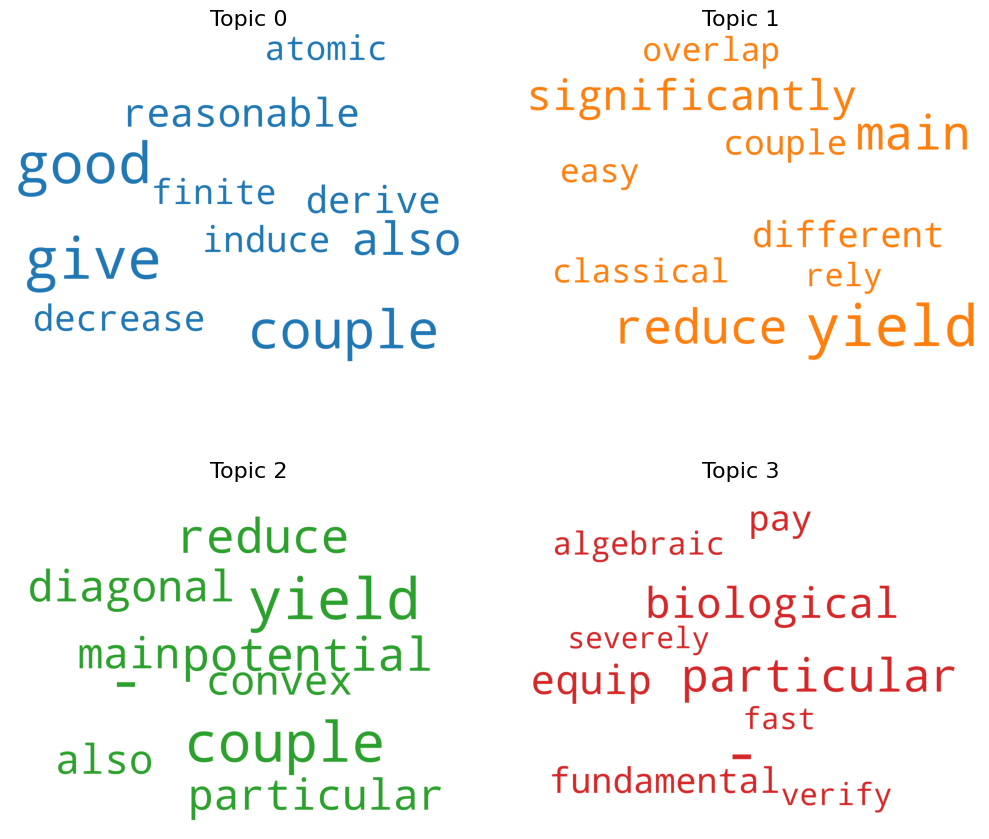

In [21]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()
        ]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [22]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
#from sklearn.manifold.t_sne import (_joint_probabilities,
#_kl_divergence)
RS = 20200807

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import gensim

In [24]:
final_df = pd.read_csv('Abstract_With_topics.csv')
final_df.head(10)

,index,ID,TITLE,ABSTRACT,ABSTRACT_Topic,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,Computer Science,0.053478,0.000718,0.008020,0.000000,0.000000,0.011849
1,1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,Statistics,0.014648,0.004958,0.000000,0.060959,0.000000,0.000000
2,2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,Physics,0.000000,0.033019,0.000000,0.001113,0.000000,0.006254
3,3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,Physics,0.000000,0.048890,0.012750,0.000000,0.000000,0.027562
4,4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,Computer Science,0.032414,0.000000,0.003643,0.000000,0.001994,0.011012
5,5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,Physics,0.000487,0.032285,0.003016,0.000000,0.000838,0.004758
6,6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,Mathematics,0.006653,0.002847,0.018059,0.000000,0.000065,0.001631
7,7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,Mathematics,0.000772,0.000000,0.048623,0.002285,0.000000,0.000000
8,8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,Mathematics,0.000000,0.001569,0.073416,0.000000,0.000000,0.000000
9,9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,Mathematics,0.016325,0.006806,0.020978,0.001517,0.000689,0.000000


In [25]:
# For preprocessing and modeling
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error


In [26]:
preprocessed_data = [
    gensim.utils.simple_preprocess(doc) for doc in final_df['ABSTRACT']
]

# Generate labeled data
lda_data = []
for i, doc in enumerate(preprocessed_data):
    topics = lda_model.get_document_topics(bow_corpus[i])
    topic_probs = [0] * lda_model.num_topics
    for topic in topics:
        topic_probs[topic[0]] = topic[1]
    topic_label = max(range(len(topic_probs)), key=topic_probs.__getitem__)
    lda_data.append((final_df['ABSTRACT'][i], final_df['ABSTRACT_Topic'][i]))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split([x[0] for x in lda_data],
                                                    [x[1] for x in lda_data],
                                                    test_size=0.2,
                                                    random_state=42)

# Convert text data to vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score for multinomialNB model: {accuracy}")


Accuracy score for multinomialNB model: 0.769249106078665


In [27]:
# Preprocess data
preprocessed_data = [
    gensim.utils.simple_preprocess(doc) for doc in final_df['ABSTRACT']
]

# Generate labeled data
lda_data = []
for i, doc in enumerate(preprocessed_data):
    topics = lda_model.get_document_topics(bow_corpus[i])
    topic_probs = [0] * lda_model.num_topics
    for topic in topics:
        topic_probs[topic[0]] = topic[1]
    topic_label = max(range(len(topic_probs)), key=topic_probs.__getitem__)
    lda_data.append((final_df['ABSTRACT'][i], final_df['ABSTRACT_Topic'][i]))

# Split data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split([x[0] for x in lda_data],
                                                    [x[1] for x in lda_data],
                                                    test_size=0.2,
                                                    random_state=42)

# Convert text data to vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
X_train_tfidf1 = tfidf_vectorizer.fit_transform(X_train1)
X_test_tfidf1 = tfidf_vectorizer.transform(X_test1)

# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=5).fit(X_train_tfidf1, y_train1)

# Make predictions on test data
y_pred = rfc.predict(X_test_tfidf1)

# Calculate accuracy score
accuracy1 = accuracy_score(y_test1, y_pred)
print(f"Accuracy score for Random Forest Classifier model: {accuracy1}")

Accuracy score for Random Forest Classifier model: 0.6042908224076281


In [28]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate labeled data
lda_data = []
for i, doc in enumerate(preprocessed_data):
    topics = lda_model.get_document_topics(bow_corpus[i])
    topic_probs = [0] * lda_model.num_topics
    for topic in topics:
        topic_probs[topic[0]] = topic[1]
    topic_label = max(range(len(topic_probs)), key=topic_probs.__getitem__)
    lda_data.append((final_df['ABSTRACT'][i], final_df['ABSTRACT_Topic'][i]))

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split([x[0] for x in lda_data],
                                                    [x[1] for x in lda_data],
                                                    test_size=0.2,
                                                    random_state=42)

# Convert text data to vectors using TF-IDF
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
X_train_tfidf2 = tfidf_vectorizer.fit_transform(X_train2)
X_test_tfidf2 = tfidf_vectorizer.transform(X_test2)

# Train an SVM classifier
svcm = SVC(kernel='rbf', C=1.0, random_state=42)
svcm.fit(X_train_tfidf2, y_train2)

# Make predictions on test data
y_pred2 = svcm.predict(X_test_tfidf2)

# Calculate accuracy score
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Accuracy score for SVM model: {accuracy2}")

Accuracy score for SVM model: 0.9053635280095351


In [31]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on test data
y_pred = clf.predict(X_test_tfidf)
y_pred1 = rfc.predict(X_test_tfidf1)
y_pred2 = svcm.predict(X_test_tfidf2)

# Calculate evaluation metrics for multinomial
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate evaluation metrics for random forest
accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='macro')
recall1 = recall_score(y_test1, y_pred1, average='macro')
f2 = f1_score(y_test1, y_pred1, average='macro')

# Calculate evaluation metrics for SVC
accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2, average='macro')
recall2 = recall_score(y_test2, y_pred2, average='macro')
f3 = f1_score(y_test2, y_pred2, average='macro')

# Print evaluation metrics
print(f"Accuracy: (MNB {accuracy}), (RFC {accuracy1}), (SVC {accuracy2})")
print(f"Precision: (MNB {precision}), (RFC {precision1}), (SVC {precision2})")
print(f"Recall: (MNB {recall}), (RFC {recall1}), (SVC {recall2})")
print(f"F1-score: (MNB {f1}), (RFC {f2}), (SVC {f3})")
print('\n')
# Print classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_test1, y_pred1))
print(classification_report(y_test2, y_pred2))

C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rayni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWa

Accuracy: (MNB 0.769249106078665), (RFC 0.6042908224076281), (SVC 0.9053635280095351)
Precision: (MNB 0.8267586510106694), (RFC 0.45980647916638073), (SVC 0.9228873176561305)
Recall: (MNB 0.595773741544386), (RFC 0.4369084512877173), (SVC 0.8707228233239825)
F1-score: (MNB 0.5833374614924293), (RFC 0.40535805825350213), (SVC 0.8920966249335924)


                      precision    recall  f1-score   support

    Computer Science       0.62      0.89      0.73       907
         Mathematics       0.91      0.89      0.90      1093
             Physics       0.86      0.86      0.86       922
Quantitative Biology       1.00      0.02      0.05       161
Quantitative Finance       0.72      0.78      0.75       768
          Statistics       0.85      0.12      0.21       344

            accuracy                           0.77      4195
           macro avg       0.83      0.60      0.58      4195
        weighted avg       0.80      0.77      0.74      4195

                      precis

In [ ]:
# Create a WordCloud
py_df = final_df[(final_df['ABSTRACT_Topic'] == 'Computer Science')]

long_string = ','.join(list(py_df.ABSTRACT.values))

wordcloud = WordCloud(stopwords=stopwords.words('english'),
                      width=1920,
                      height=1080,
                      background_color="white",
                      max_words=100,
                      contour_width=3,
                      colormap='summer',
                      random_state=720)

wordcloud.generate(long_string)

plt.figure(figsize=(25, 10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title("100 most common words in Computer Science", pad=14, weight='bold')

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()